In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

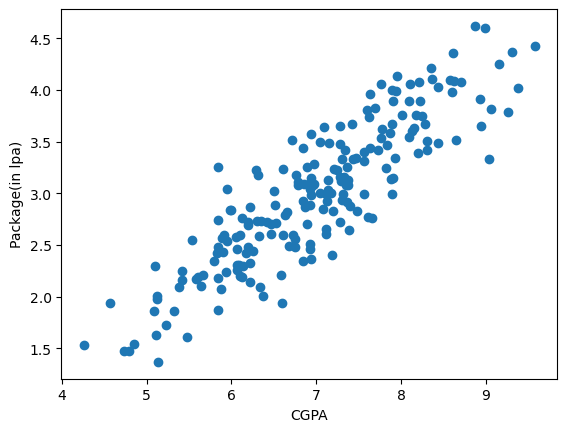

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

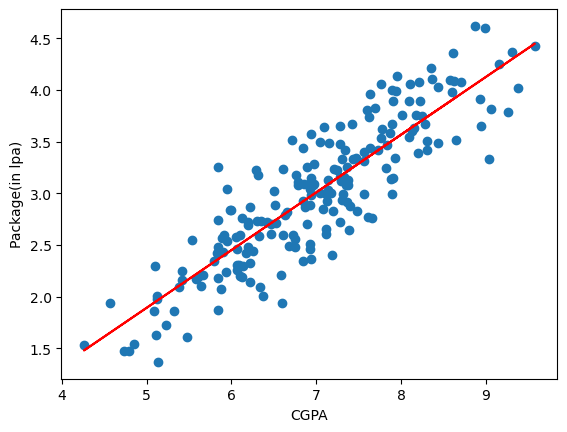

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
y_pred=lr.predict(X_test)
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [14]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [19]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [20]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [21]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
# no function present in scikit learn hence with the help of numpy we are finding it


RMSE 0.34827051717731616


In [22]:
print("R2-SCORE",r2_score(y_test,y_pred))

R2-SCORE 0.780730147510384


In [23]:
X_test.shape


(40, 1)

In [28]:
# Adjusted r2 score
r2=r2_score(y_test,y_pred)


In [29]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [30]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.873863,3.26
1,5.12,0.818847,1.98
2,7.82,0.625183,3.25
3,7.42,0.305193,3.67
4,6.94,0.724537,3.57


Text(0, 0.5, 'Package(in lpa)')

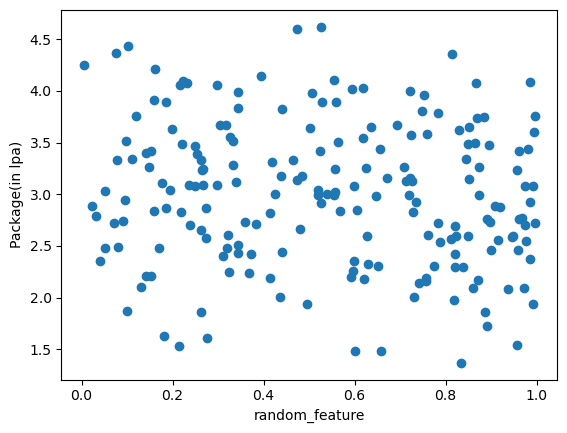

In [31]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [34]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)
y_pred

array([3.90847325, 3.11298747, 2.36222682, 2.57036198, 1.66042637,
       1.7764551 , 2.0537437 , 2.95060484, 3.78424022, 2.95390791,
       4.07011353, 3.49945892, 3.00271694, 2.38602377, 3.18701023,
       3.46088745, 1.96417018, 3.25798266, 2.94902494, 3.41700921,
       2.58911777, 3.15970809, 2.83453113, 3.14083688, 3.70203418,
       2.84773469, 3.48043764, 3.33090778, 3.88943776, 1.95205444,
       3.67068858, 3.21096333, 3.73733476, 2.75947209, 2.80551261,
       3.25262912, 3.55372968, 2.63173382, 2.66570238, 2.70133898])

In [40]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7858432440521222


In [41]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7742672031900748

In [42]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
124,6.06,2.61,2.31
6,6.73,2.10,2.60
45,7.87,2.88,3.58
57,6.60,2.24,1.94
127,6.78,3.21,3.11


Text(0, 0.5, 'Package(in lpa)')

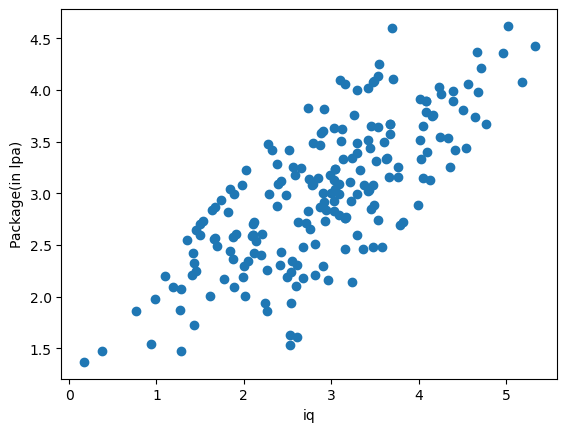

In [43]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [53]:
np.random.randint(-100,100)

78

In [54]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [57]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8400669252268591


In [58]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8314218941580407